<a href="https://colab.research.google.com/github/difaahh/Machine-Learning/blob/main/kmeans_country_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Klaster Negara dengan K-Means untuk Prioritas Bantuan Sosial: Studi Kasus HELP International


Anggota:


1.   Alfi Purwaningrum (12062200
2.   Rofitaun Nadifah (12062200
3.   Salsabila Felda (1206220039)



# 0.0 Overview Dataset

Sumber data set : [Kaggel- Unsupervised Learning on Country Data](https://https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

Metadata:

*   **country**: nama negara
*   **child_mort**: kematian anak per 1000 kelahiran
*   **exports**: ekspor sebagai % dari PDB
*   **health**: pengeluaran sektor kesehatan sebagai % dari PDB
*   **imports**: impor sebagai % dari PDB
*   **income**: pendapatan per kapita
*  **inflation** : inflasi tahunan %
*   **life_expec**: harapan hidup
*   **total_fer**: total fertilitas (jumlah anak per wanita)
*  **gdpp**: GDP per kapita




# 01.Inport Libraries

In [ ]:
!pip install kneed


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator



# 02.Dataset Preparation

In [ ]:
data = pd.read_csv ('https://raw.githubusercontent.com/difaahh/Machine-Learning/refs/heads/main/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 03.Preprocessing

In [ ]:
data.describe(include = 'all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


## Check Column Data Types

In [ ]:
data.shape

(167, 10)

In [ ]:
data.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


## Check Missing Values

In [ ]:
data.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [ ]:
data.duplicated().sum()

np.int64(0)

## Check Noises

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.7})

In [ ]:
columns_for_clustering = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

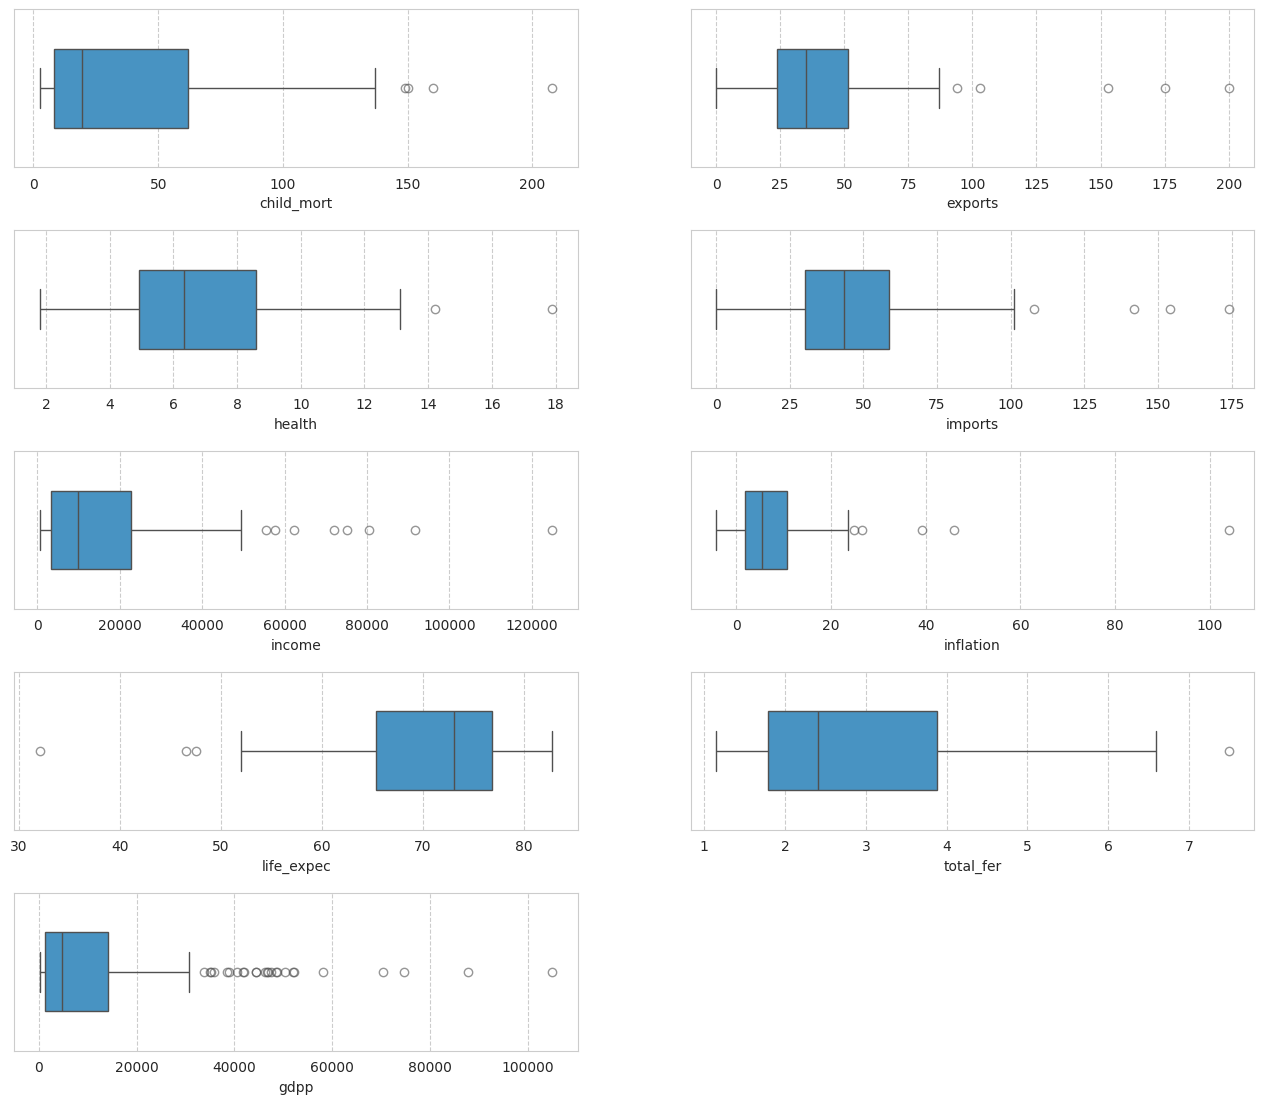

In [ ]:
plt.figure(figsize = (16,25))

for i in range(1,10):

    plt.subplot(9,2,i)
    sns.boxplot(x = columns_for_clustering[i-1],
                data = data,
                width = 0.5,
                color = '#3498D6',
                flierprops = {'alpha': 0.6})

plt.subplots_adjust(hspace = 0.4)
plt.show()

Scatter Plot

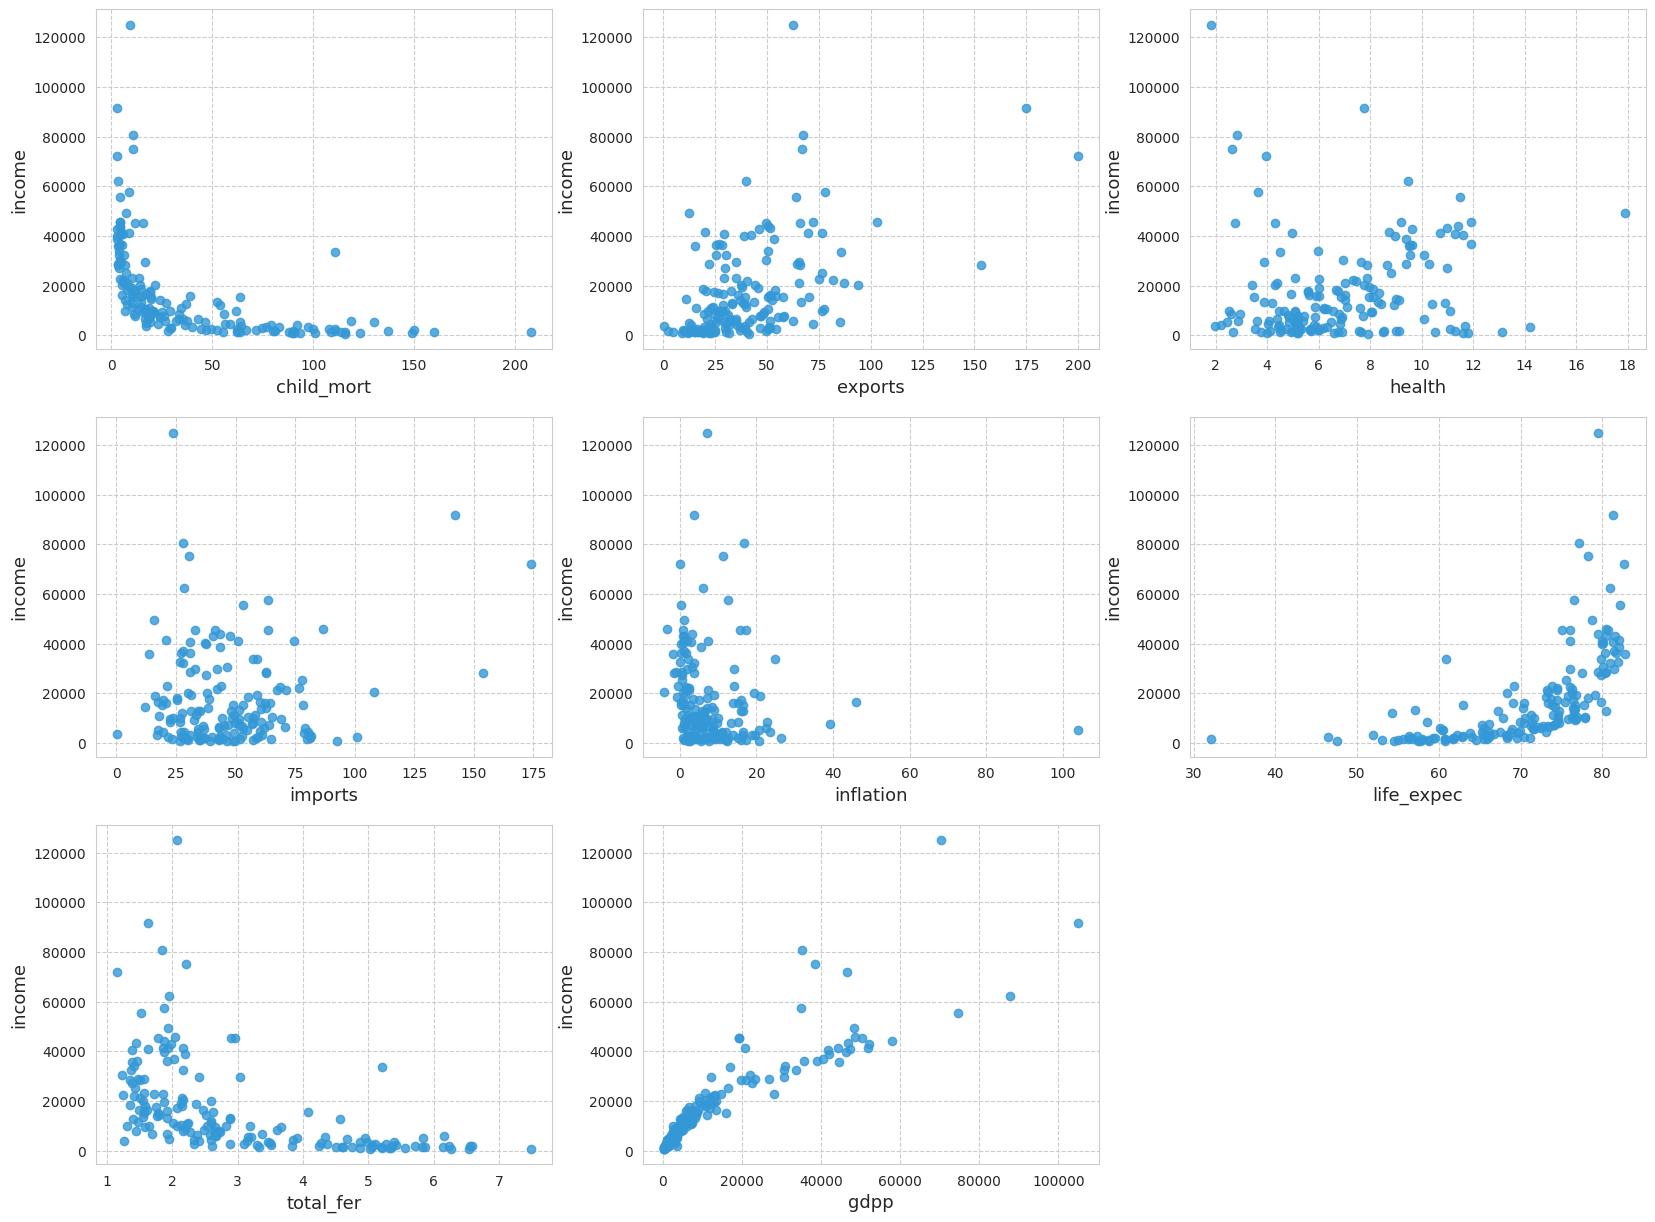

In [ ]:
features = columns_for_clustering.copy()
features.remove('income')
y = 'income'

plt.figure(figsize = (20,15))

for i in range(1, 9):
    plt.subplot(3,3,i)
    plt.scatter(data[features[i-1]], data[y], alpha = 0.8, color = '#3498D6')
    plt.xlabel(features[i-1], fontsize = 13)
    plt.ylabel(y, fontsize = 13)

plt.show()

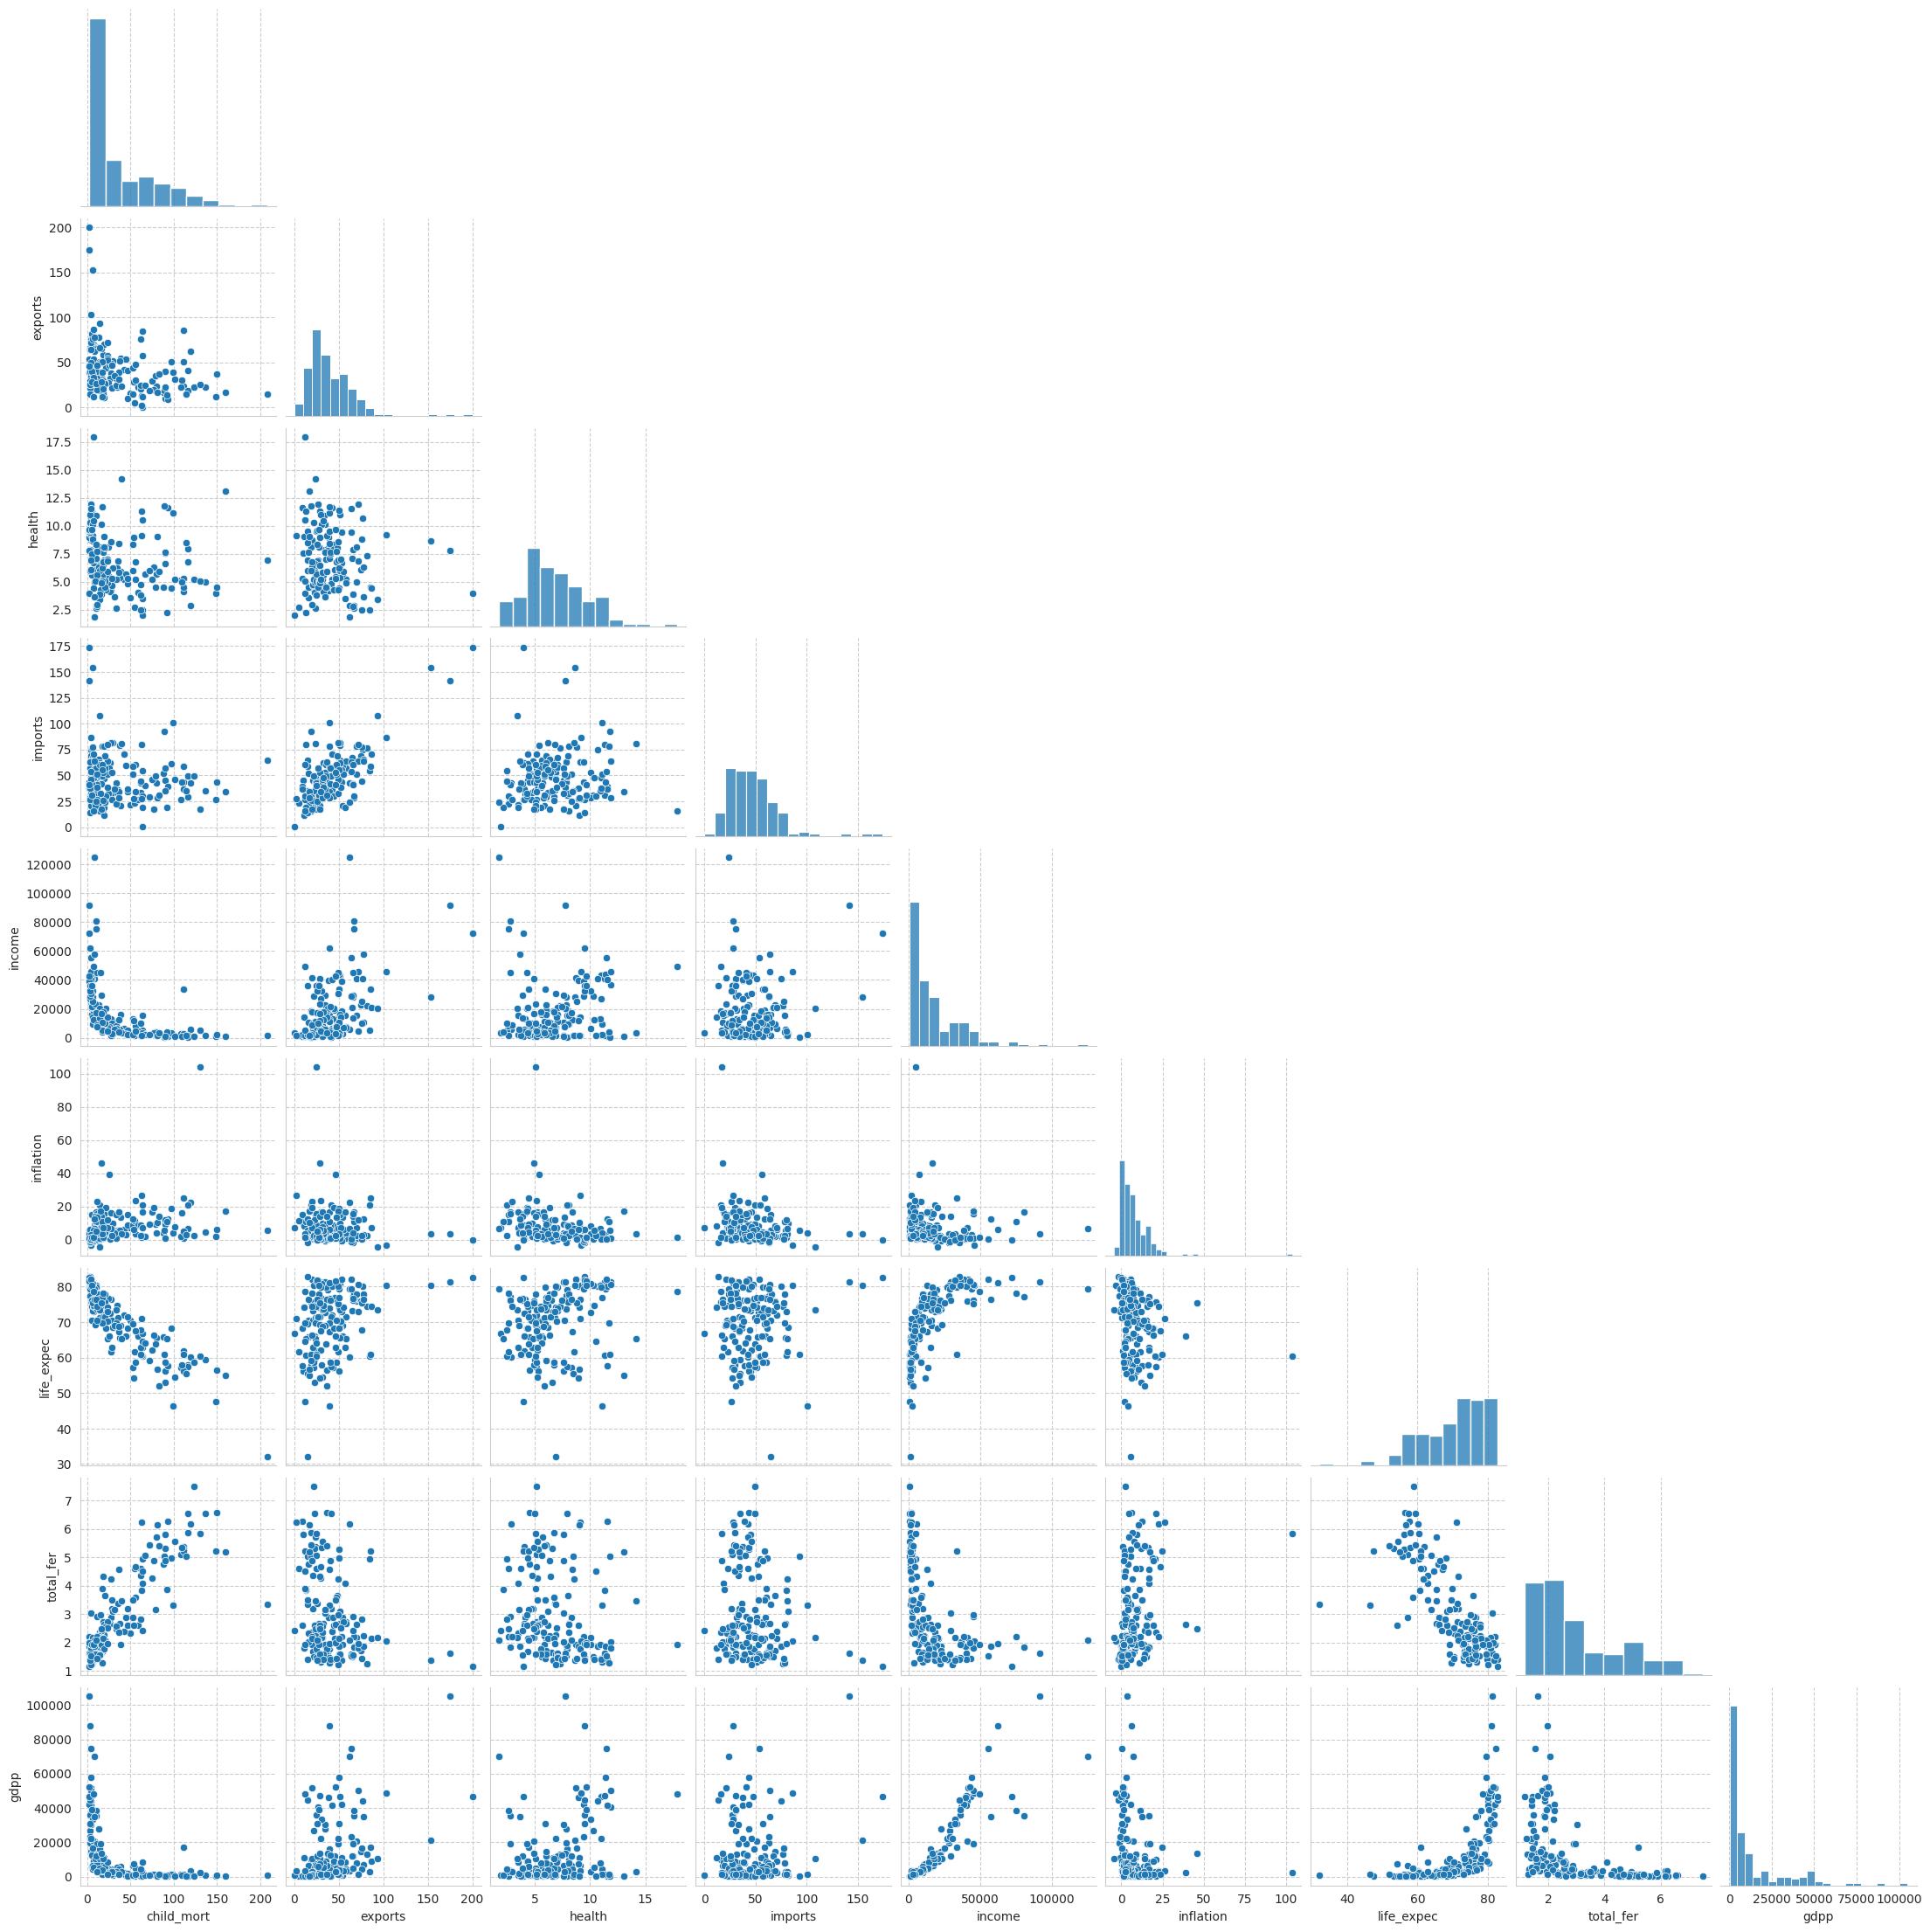

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = columns_for_clustering.copy()  # misalnya 9 fitur kamu
sns.pairplot(data[features], corner=True)  # corner=True untuk tampilkan hanya bagian bawah
plt.show()


KDE Plot

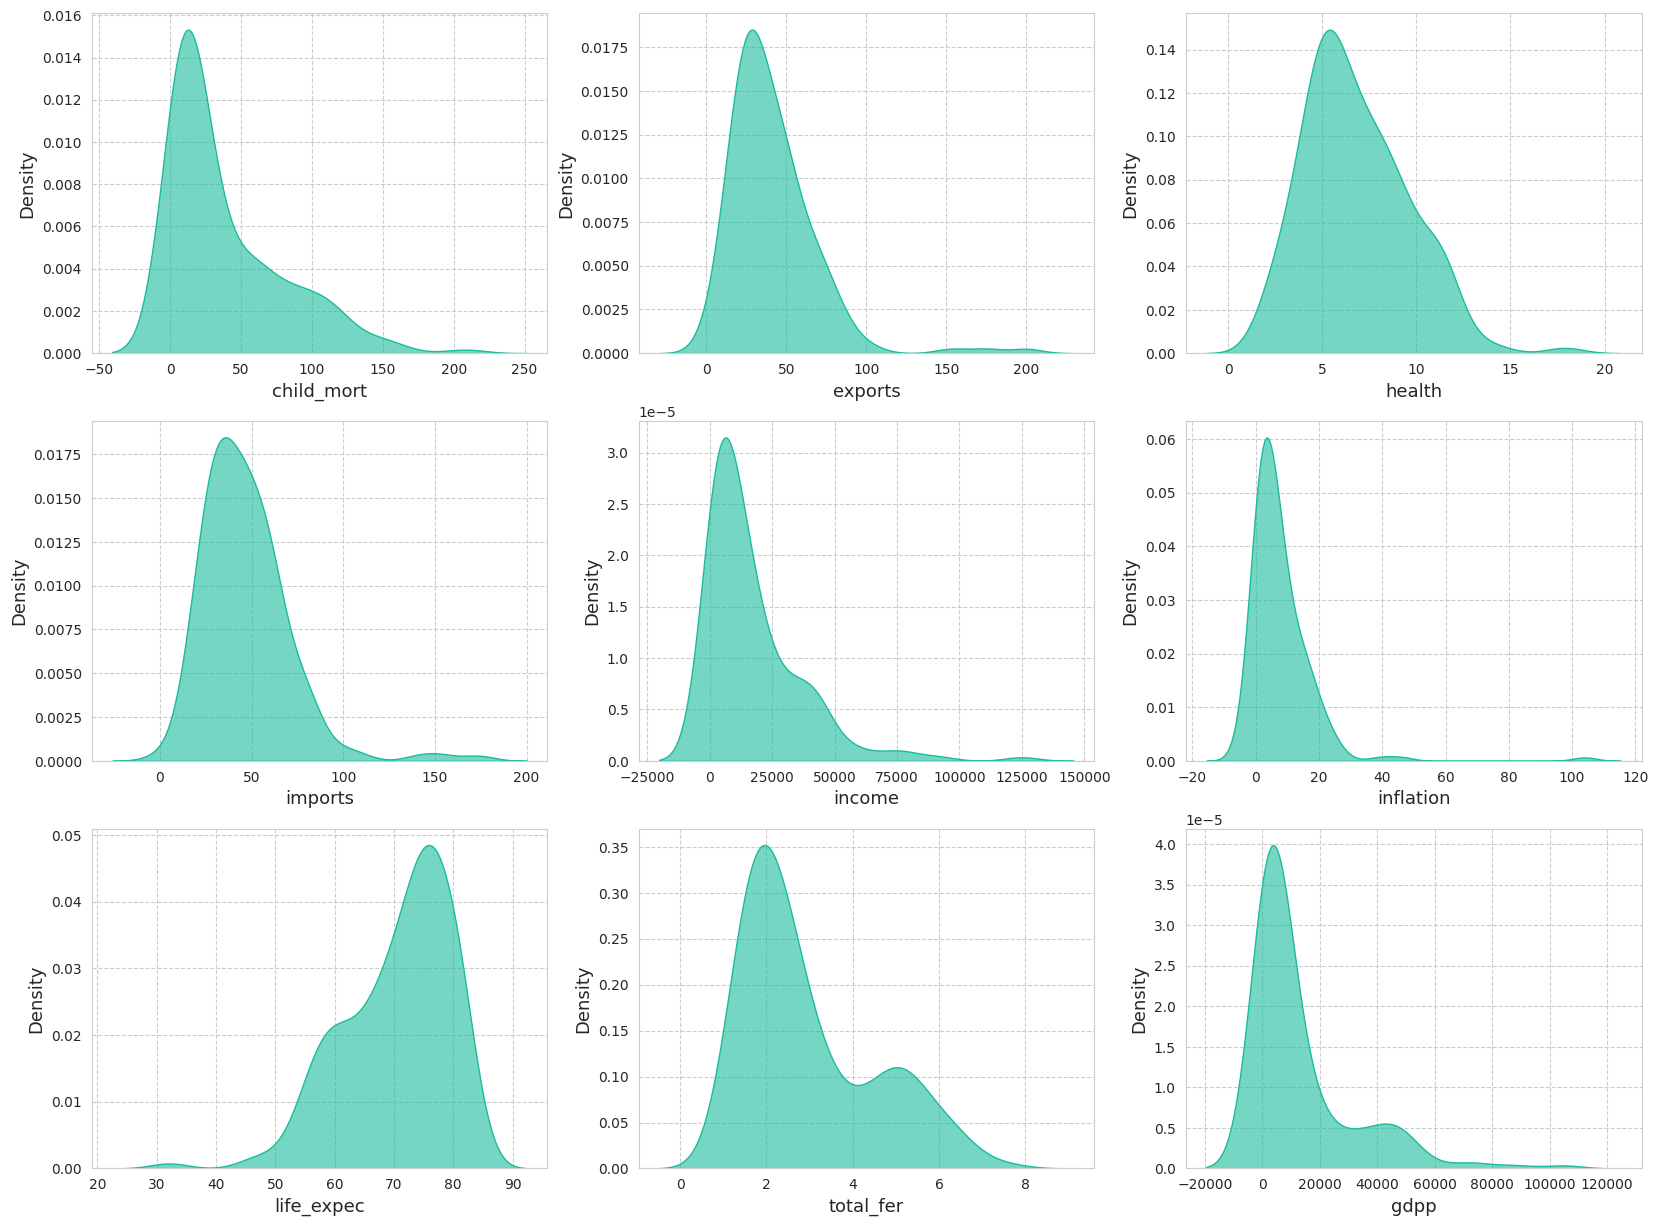

In [ ]:
plt.figure(figsize = (20,15))

for i in range(1, 10):
    plt.subplot(3,3,i)
    sns.kdeplot(data[columns_for_clustering[i-1]], fill = True, color = '#1ABC9C', alpha = 0.6)
    plt.xlabel(columns_for_clustering[i-1], fontsize = 13)
    plt.ylabel("Density", fontsize = 13)

plt.show()

Heatmap

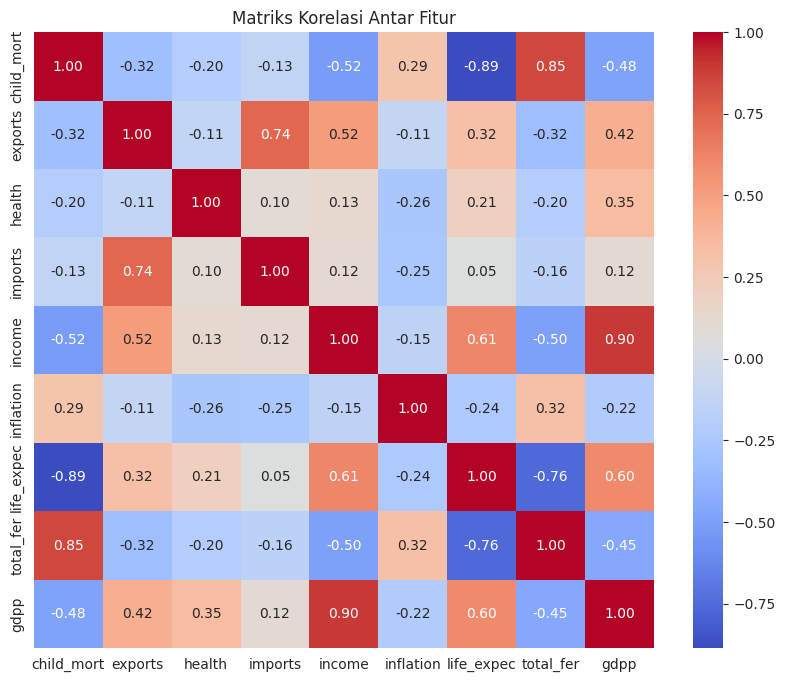

In [ ]:
corr_matrix = (data.select_dtypes(exclude='object')).corr()

# Tampilkan matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

#  04.Load dan Split Data

In [ ]:
# Ambil fitur numerik
x = data.drop(columns='country')
negara = data['country']


# Split training dan testing (fitur dan nama negara)
x_train, x_test, negara_train, negara_test = train_test_split(x, negara, test_size=0.2, random_state=42)

In [ ]:
x_train

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
158,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
100,15.0,51.2,6.00,62.2,15900,1.13,73.4,1.57,8000
126,63.6,12.0,10.50,30.0,1350,2.61,64.6,4.51,563
68,2.6,53.4,9.40,43.3,38800,5.47,82.0,2.20,41900
...,...,...,...,...,...,...,...,...,...
71,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
106,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
14,5.5,51.4,5.61,64.5,16200,15.10,70.4,1.49,6030
92,10.4,39.8,7.09,58.1,11400,2.04,74.0,1.47,4540


In [ ]:
x_test

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
101,40.0,23.50,14.20,81.0,3340,3.800,65.4,3.46,2860
108,56.0,47.80,6.78,60.7,8460,3.560,58.6,3.60,5190
78,21.1,48.30,8.04,69.0,9470,8.430,75.8,3.66,3680
56,80.3,23.80,5.69,42.7,1660,4.300,65.5,5.71,562
98,6.8,153.00,8.65,154.0,28300,3.830,80.3,1.36,21100
29,5.6,29.10,11.30,31.0,40700,2.870,81.3,1.63,47400
105,33.5,32.20,5.20,43.0,6440,0.976,73.5,2.58,2830
82,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500
104,6.8,37.00,9.11,62.7,14000,1.600,76.4,1.77,6680
109,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592


# 0.5 Normalisasi Data

Setiap fitur diskalakan ke rentang [0, 1] agar jarak antar data adil saat hitung Euclidean.
Tujuan:
*   Menghapus kolom non-numerik (country)
*   Melakukan normalisasi Min-Max secara manual

Rumus Min-Max Normalisasi:
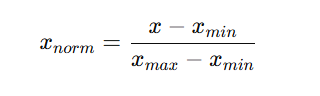



In [ ]:
def normalisasi(df):
    hasil = []
    for kolom in df.columns:
        mini = df[kolom].min()
        maksi = df[kolom].max()
        norm = [(x - mini) / (maksi - mini) if maksi != mini else 0 for x in df[kolom]]
        hasil.append(norm)
    return pd.DataFrame(list(zip(*hasil)), columns=df.columns)


In [ ]:
# Normalisasi train dan test secara terpisah
x_train_norm = normalisasi(x_train)
x_test_norm = normalisasi(x_test)

## PCA

In [ ]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

In [ ]:
pca.explained_variance_ratio_

array([0.54874837, 0.1370001 ])

# 0.6 K Means Manual

##  Fungsi Euclidean dan K-Means Manual

In [ ]:
# Fungsi jarak Euclidean
def euclidean(a, b):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))

In [ ]:
# Assign ke cluster terdekat
def assign_cluster(data, centroids):
    hasil = []
    for titik in data:
        jarak = [euclidean(titik, c) for c in centroids]
        cluster = jarak.index(min(jarak))
        hasil.append(cluster)
    return hasil

In [ ]:
# Update centroid
def update_centroid(data, labels, k):
    hasil = []
    for i in range(k):
        cluster_data = [data[j] for j in range(len(data)) if labels[j] == i]
        if cluster_data:
            rerata = [sum(x) / len(x) for x in zip(*cluster_data)]
            hasil.append(rerata)
        else:
            hasil.append(random.choice(data))
    return hasil

In [ ]:
data_array = x_train_norm.values.tolist()
k_values = list(range(2, 11))
inertia = []
silhouette = []

# Proses clustering untuk tiap k
for k in k_values:
    # Inisialisasi centroid acak
    centroids = random.sample(data_array, k)
    for _ in range(20):
        labels = assign_cluster(data_array, centroids)
        new_centroids = update_centroid(data_array, labels, k)
        if new_centroids == centroids:
            break
        centroids = new_centroids

    # Hitung inertia dan silhouette
    inertia.append(sum(
        euclidean(data_array[i], centroids[labels[i]]) ** 2 for i in range(len(data_array))
    ))
    silhouette.append(silhouette_score(x_train_norm, labels))

# Gunakan KneeLocator untuk cari elbow point otomatis
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k_elbow = knee_locator.elbow

# Cari k terbaik dari silhouette (maksimum)
optimal_k_silhouette = k_values[silhouette.index(max(silhouette))]

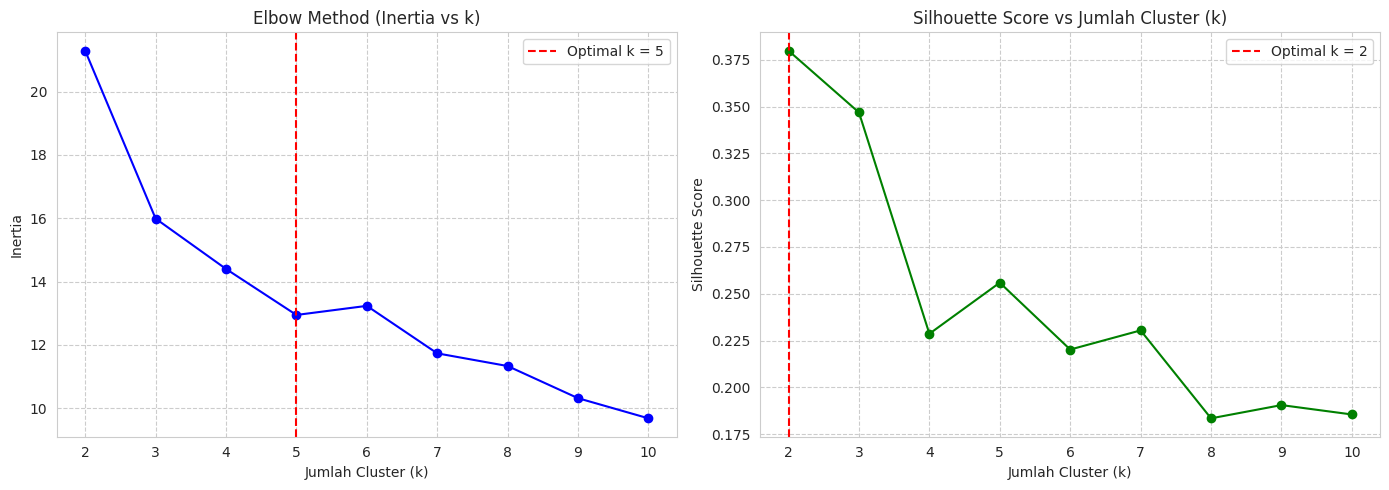

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Elbow
axs[0].plot(k_values, inertia, marker='o', color='blue')
axs[0].axvline(optimal_k_elbow, linestyle='--', color='red', label=f'Optimal k = {optimal_k_elbow}')
axs[0].set_title("Elbow Method (Inertia vs k)")
axs[0].set_xlabel("Jumlah Cluster (k)")
axs[0].set_ylabel("Inertia")
axs[0].legend()
axs[0].grid(True)

# Plot Silhouette
axs[1].plot(k_values, silhouette, marker='o', color='green')
axs[1].axvline(optimal_k_silhouette, linestyle='--', color='red', label=f'Optimal k = {optimal_k_silhouette}')
axs[1].set_title("Silhouette Score vs Jumlah Cluster (k)")
axs[1].set_xlabel("Jumlah Cluster (k)")
axs[1].set_ylabel("Silhouette Score")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

##  K-Means Manual dengan k Terbaik

In [ ]:
k = 5
centroid = random.sample(data_array, k)

for iterasi in range(100):
    label_train = assign_cluster(data_array, centroid)
    centroid_baru = update_centroid(data_array, label_train, k)
    if centroid == centroid_baru:
        print(f"Konvergen di iterasi ke-{iterasi+1}")
        break
    centroid = centroid_baru


Konvergen di iterasi ke-8


In [ ]:
k2 = 2
centroid_k2 = random.sample(data_array, k2)

for iterasi in range(100):
    label_train_k2 = assign_cluster(data_array, centroid_k2)
    centroid_baru_k2 = update_centroid(data_array, label_train_k2, k2)
    if centroid_k2 == centroid_baru_k2:
        print(f"[K=2] Konvergen di iterasi ke-{iterasi+1}")
        break
    centroid_k2 = centroid_baru_k2

[K=2] Konvergen di iterasi ke-6


##  Uji Cluster di Data Test



*   Menggunakan centroid dari data latih untuk mengelompokkan data uji.
*   Bisa dibandingkan secara distribusi, visualisasi, atau analisis statistik.



In [ ]:
data_test_array = x_test_norm.values.tolist()
label_test = assign_cluster(data_test_array, centroid)


In [ ]:
data_test_array_k2 = x_test_norm.values.tolist()
label_test_k2 = assign_cluster(data_test_array_k2, centroid_k2)


In [ ]:
# Asumsikan kamu sudah punya: label_test, data_test_array, x_test, negara_test
x_test_copy = x_test.copy()
x_test_copy["country"] = negara_test.values
x_test_copy["cluster"] = label_test


In [ ]:
x_test_k2 = x_test.copy()
x_test_k2["country"] = negara_test.values
x_test_k2["cluster"] = label_test_k2

## Visualisasi Hasil Cluster (Opsional)

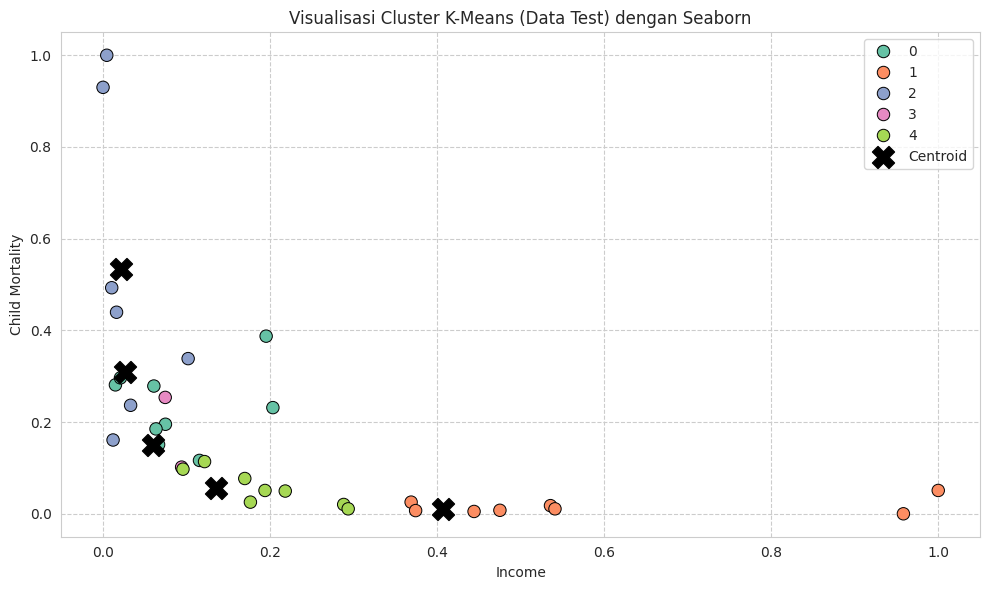

In [ ]:
# Ambil index kolom income dan child_mort
idx_income = x.columns.get_loc("income")
idx_mort = x.columns.get_loc("child_mort")

# Buat DataFrame dari data test dan label
test_df = pd.DataFrame(data_test_array, columns=x.columns)
test_df['cluster'] = label_test

# Tambahkan koordinat centroid ke dalam DataFrame terpisah
centroid_df = pd.DataFrame(centroid, columns=x.columns)
centroid_df['cluster'] = [f'C{i}' for i in range(k)]  # Label centroid agar beda

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=test_df,
    x="income", y="child_mort",
    hue="cluster",
    palette="Set2",
    s=80,
    edgecolor="black"
)

# Tambahkan centroid ke plot
plt.scatter(
    [centroid[i][idx_income] for i in range(k)],
    [centroid[i][idx_mort] for i in range(k)],
    c='black',
    s=250,
    marker='X',
    label='Centroid'
)

plt.title("Visualisasi Cluster K-Means (Data Test) dengan Seaborn")
plt.xlabel("Income")
plt.ylabel("Child Mortality")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

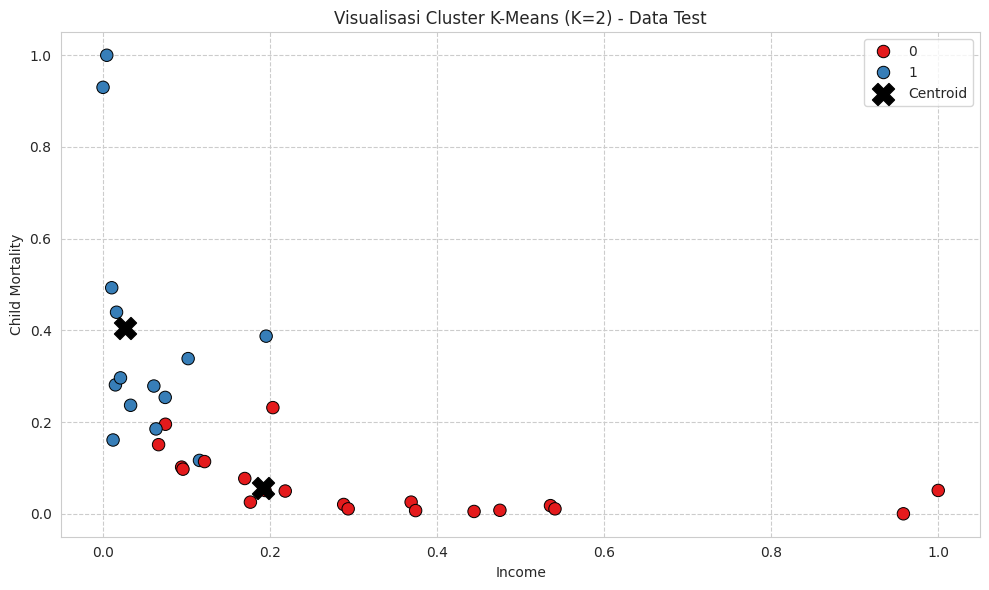

In [ ]:
idx_income = x.columns.get_loc("income")
idx_mort = x.columns.get_loc("child_mort")

# Buat DataFrame dari test dan label (k=2)
test_df_k2 = pd.DataFrame(data_test_array_k2, columns=x.columns)
test_df_k2['cluster'] = label_test_k2

centroid_df_k2 = pd.DataFrame(centroid_k2, columns=x.columns)
centroid_df_k2['cluster'] = [f'C{i}' for i in range(k2)]

# Plot K=2
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=test_df_k2,
    x="income", y="child_mort",
    hue="cluster",
    palette="Set1",
    s=80,
    edgecolor="black"
)
plt.scatter(
    [centroid_k2[i][idx_income] for i in range(k2)],
    [centroid_k2[i][idx_mort] for i in range(k2)],
    c='black',
    s=250,
    marker='X',
    label='Centroid'
)
plt.title("Visualisasi Cluster K-Means (K=2) - Data Test")
plt.xlabel("Income")
plt.ylabel("Child Mortality")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_train_hasil = x_train.copy()               # Salin data asli (sebelum normalisasi)
df_train_hasil["cluster"] = label_train

In [ ]:
# Data hasil klaster k=2
df_train_hasil_k2 = x_train.copy()
df_train_hasil_k2["cluster"] = label_train_k2

In [ ]:
df_test_hasil = x_test.copy()
df_test_hasil["cluster"] = label_test
df_test_hasil["country"] = negara_test.values

In [ ]:
df_test_hasil_k2 = x_test.copy()
df_test_hasil_k2["cluster"] = label_test_k2
df_test_hasil_k2["country"] = negara_test.values


In [ ]:
print("Data Train dengan Cluster:")
df_train_hasil.head()

Data Train dengan Cluster:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
158,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4
100,15.0,51.2,6.00,62.2,15900,1.13,73.4,1.57,8000,4
126,63.6,12.0,10.50,30.0,1350,2.61,64.6,4.51,563,0
68,2.6,53.4,9.40,43.3,38800,5.47,82.0,2.20,41900,1


In [ ]:
print("Data Train dengan Cluster (K=2):")
df_train_hasil_k2.head()

Data Train dengan Cluster (K=2):


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
158,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
100,15.0,51.2,6.00,62.2,15900,1.13,73.4,1.57,8000,0
126,63.6,12.0,10.50,30.0,1350,2.61,64.6,4.51,563,1
68,2.6,53.4,9.40,43.3,38800,5.47,82.0,2.20,41900,0


# 0.7Lihat Distribusi Negara per Klaster

In [ ]:
summary = x_test_copy.groupby("cluster")["country"].apply(list).reset_index()
summary["jumlah_negara"] = summary["country"].apply(len)
summary = summary[["cluster", "jumlah_negara", "country"]]
summary


,cluster,jumlah_negara,country
0,0,9,"[Jordan, Morocco, Nepal, Bolivia, Bangladesh, ..."
1,1,8,"[Malta, Canada, Kuwait, Cyprus, Belgium, Singa..."
2,2,7,"[Micronesia, Fed. Sts., Namibia, Gambia, Centr..."
3,3,2,"[Belize, Bhutan]"
4,4,8,"[Montenegro, Hungary, Bulgaria, Estonia, Urugu..."


In [ ]:
# Summary negara tiap cluster
summary_k2 = x_test_k2.groupby("cluster")["country"].apply(list).reset_index()
summary_k2["jumlah_negara"] = summary_k2["country"].apply(len)
summary_k2 = summary_k2[["cluster", "jumlah_negara", "country"]]
summary_k2

,cluster,jumlah_negara,country
0,0,20,"[Malta, Canada, Morocco, Kuwait, Montenegro, C..."
1,1,14,"[Micronesia, Fed. Sts., Namibia, Jordan, Gambi..."


In [ ]:
rata2_klaster = x_test_copy.groupby("cluster")[["income", "child_mort", "gdpp","inflation"]].mean()
rata2_klaster


,income,child_mort,gdpp,inflation
cluster,,,,
0,7620.000000,39.877778,3318.888889,8.394556
1,44525.000000,5.250000,36437.500000,2.842000
2,2776.857143,83.614286,1635.571429,6.704286
3,7150.000000,30.750000,3260.000000,3.565000
4,15352.500000,11.550000,8638.750000,3.752500


In [ ]:
# Rata-rata indikator tiap cluster k=2
rata2_klaster_k2 = x_test_k2.groupby("cluster")[["income", "child_mort", "gdpp", "inflation"]].mean()
rata2_klaster_k2

,income,child_mort,gdpp,inflation
cluster,,,,
0,25758.500000,12.620000,18846.500000,3.45885
1,4726.285714,63.407143,2251.357143,8.08500


# 0.8 Interpretasi Hasil

## K-5

Cluster 0

*   Cluster 0 terdiri dari negara-negara berkembang yang rentan seperti Jordan, Maroko, Nepal, Bolivia, dan Bangladesh. Negara-negara dalam kelompok ini memiliki pendapatan menengah ke bawah, yaitu sekitar 7.620 dolar, dengan GDP rata-rata hanya 3.319 dolar. Tingkat kematian anak di klaster ini masih cukup tinggi, sekitar 40 kematian per 1.000 kelahiran, dan inflasi pun cukup berat di kisaran 8,4 persen. Kondisi ini menunjukkan perlunya intervensi kebijakan yang kuat, baik dalam bidang kesehatan, ekonomi, maupun pengendalian inflasi, agar kualitas hidup masyarakat dapat ditingkatkan.

---
Cluster 1

*    Cluster 1 berisi negara-negara maju dan stabil seperti Kanada, Belgia, Singapura, Kuwait, dan Malta. Kelompok ini memiliki indikator yang sangat baik, dengan pendapatan rata-rata mencapai 44.525 dolar dan GDP sekitar 36.438 dolar. Tingkat kematian anak sangat rendah, hanya sekitar 5 per 1.000 kelahiran, dan inflasi juga tergolong rendah, sekitar 2,8 persen. Negara-negara dalam klaster ini mencerminkan kondisi sosial ekonomi yang mapan dan menjadi acuan bagi negara lain dalam hal pembangunan dan kesejahteraan.

---

Cluster 2


*   Cluster 2 dihuni oleh negara-negara yang masih mengalami krisis pembangunan seperti Micronesia, Namibia, Gambia, dan Republik Afrika Tengah. Klaster ini menunjukkan karakteristik yang sangat rentan, dengan pendapatan hanya sekitar 2.776 dolar dan GDP rata-rata 1.635 dolar. Tingkat kematian anak sangat tinggi, mencapai 84 per 1.000 kelahiran, serta inflasi yang cukup mengganggu, yaitu sekitar 6,7 persen. Negara-negara ini membutuhkan dukungan yang signifikan baik dari dalam negeri maupun komunitas internasional untuk mengatasi krisis kesehatan dan ekonomi yang mereka hadapi.
---

Cluster 3

*   merupakan kelompok kecil yang terdiri dari Belize dan Bhutan. Kedua negara ini memiliki pendapatan menengah, sekitar 7.150 dolar, dengan GDP di kisaran 3.260 dolar. Tingkat kematian anak mencapai 31 per 1.000 kelahiran dan inflasi berada pada angka 3,5 persen. Meskipun secara ekonomi tidak tergolong sangat rendah, negara dalam klaster ini tetap membutuhkan perhatian dalam aspek kesehatan dan pembangunan infrastruktur dasar.
---
Cluster 4


*   diisi oleh negara-negara seperti Hongaria, Bulgaria, Estonia, Uruguay, dan Montenegro. Negara-negara ini bisa dikategorikan sebagai negara transisi atau berkembang maju. Pendapatan rata-rata berada pada angka 15.352 dolar dengan GDP sekitar 8.639 dolar. Tingkat kematian anak relatif rendah, sekitar 11 per 1.000 kelahiran, dan inflasi cukup stabil di angka 3,7 persen. Negara-negara dalam kelompok ini berada pada jalur positif menuju status negara maju, meskipun masih perlu memperkuat sektor produktivitas dan efisiensi ekonomi.
















## K =2

Cluster 0


* mencakup 20 negara, di antaranya Kanada, Malta, Maroko, Kuwait, Montenegro, dan Singapura. Negara-negara dalam klaster ini menunjukkan karakteristik sosial ekonomi yang relatif lebih baik. Rata-rata pendapatan mereka mencapai 25.758 dolar, dengan GDP sebesar 18.846 dolar per kapita. Tingkat kematian anak cukup rendah, yaitu sekitar 13 per 1.000 kelahiran, dan inflasi berada pada level yang terkendali, yakni sekitar 3,5 persen. Kondisi ini mencerminkan kelompok negara dengan sistem kesehatan yang baik, stabilitas ekonomi yang terjaga, dan tingkat kesejahteraan yang relatif tinggi.  

-----

 Cluster 1

*  Cluster 1 terdiri dari 14 negara seperti Mikronesia, Namibia, Yordania, dan Gambia. Klaster ini menggambarkan kelompok negara yang masih menghadapi tantangan besar dalam pembangunan. Rata-rata pendapatan mereka hanya sekitar 4.726 dolar, dengan GDP per kapita sebesar 2.251 dolar. Tingkat kematian anak di kelompok ini sangat tinggi, mencapai lebih dari 63 kematian per 1.000 kelahiran, dan inflasi pun tergolong tinggi di angka 8 persen. Data ini mengindikasikan bahwa negara-negara dalam klaster ini masih perlu melakukan perbaikan signifikan dalam bidang kesehatan, kestabilan ekonomi, dan pengentasan kemiskinan.






